In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
pd.__version__

'0.24.2'

In [2]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
plt.style.use('fivethirtyeight')

# for defining path
import os
print(os.listdir('../input/'))

# for market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

['Book1.csv', 'Book2.csv', 'Book2.xlsx', 'BreadBasket_DMS.csv', 'test1.csv', 'test3.csv']


In [3]:
data = pd.read_csv('../input/Book2.csv', header = None)

In [4]:
data.shape

(9465, 11)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,scandinavian,scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hot chocolate,jam,cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,coffee,pastry,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10
9460,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9461,truffles,tea,spanish brunch,christmas common,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9462,muffin,tacos/fajita,coffee,tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9463,coffee,pastry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9464,smoothies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10
8069,tea,bakewell,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,alfajores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3878,hot chocolate,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,scone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,bread,the bart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3396,cake,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8486,coffee,muffin,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,tea,coffee,toast,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7792,bread,coffee,juice,scone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6199,bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9465,5834,2926,1398,548,207,72,34,13,6,4
unique,83,80,70,59,57,43,29,18,8,6,3
top,coffee,coffee,coffee,coffee,coffee,bread,cake,cookies,alfajores,brownie,hot chocolate
freq,3185,1491,506,207,59,22,8,6,3,1,2


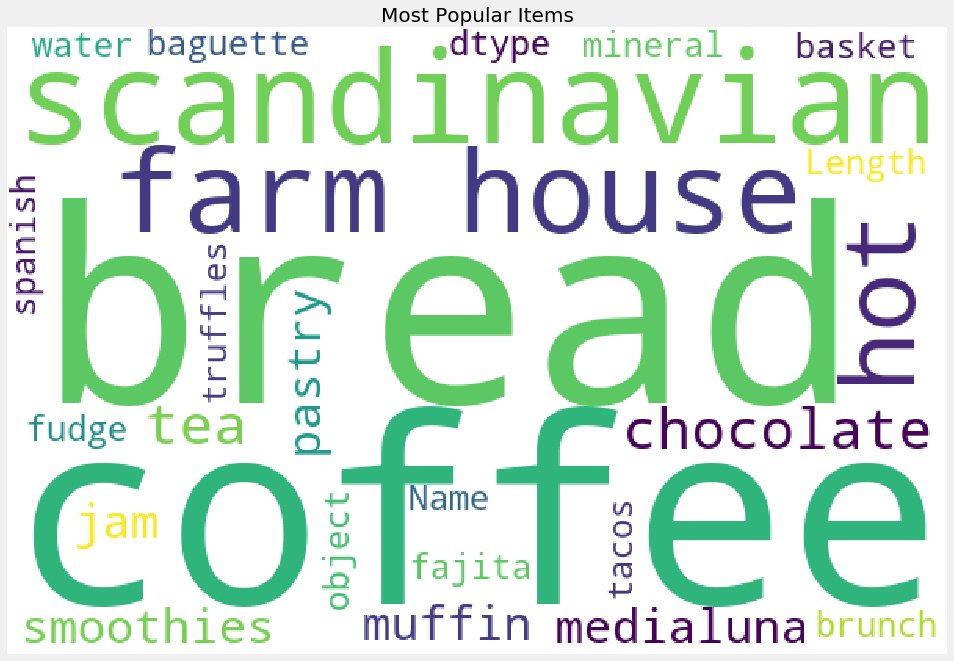

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 600,  height = 400, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items',fontsize = 20)
plt.show()

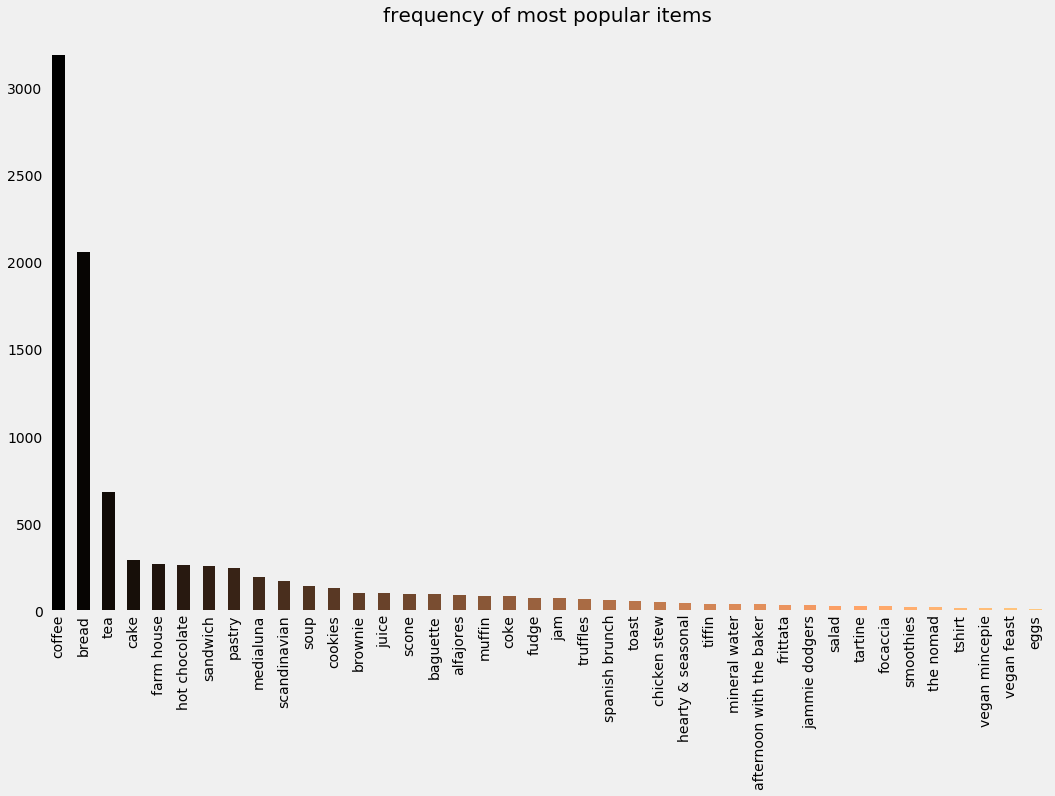

In [12]:
# looking at the frequency of most popular items 

plt.rcParams['figure.figsize'] = (16, 10)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [13]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['coffee', 'bread', 'tea', 'cake', 'farm house', 'hot chocolate',
       'sandwich', 'pastry', 'medialuna', 'scandinavian', 'soup', 'cookies',
       'brownie', 'juice', 'scone', 'baguette', 'alfajores', 'muffin', 'coke',
       'fudge', 'jam', 'truffles', 'spanish brunch', 'toast', 'chicken stew',
       'hearty & seasonal', 'tiffin', 'mineral water',
       'afternoon with the baker', 'frittata', 'jammie dodgers', 'salad',
       'tartine', 'focaccia', 'smoothies', 'the nomad', 'tshirt',
       'vegan mincepie', 'vegan feast', 'eggs', 'keeping it local', 'bakewell',
       'valentine's card', 'granola', 'dulce de leche', 'art tray',
       'mighty protein', 'muesli', 'christmas common',
       'ella's kitchen pouches'],
      dtype='object')

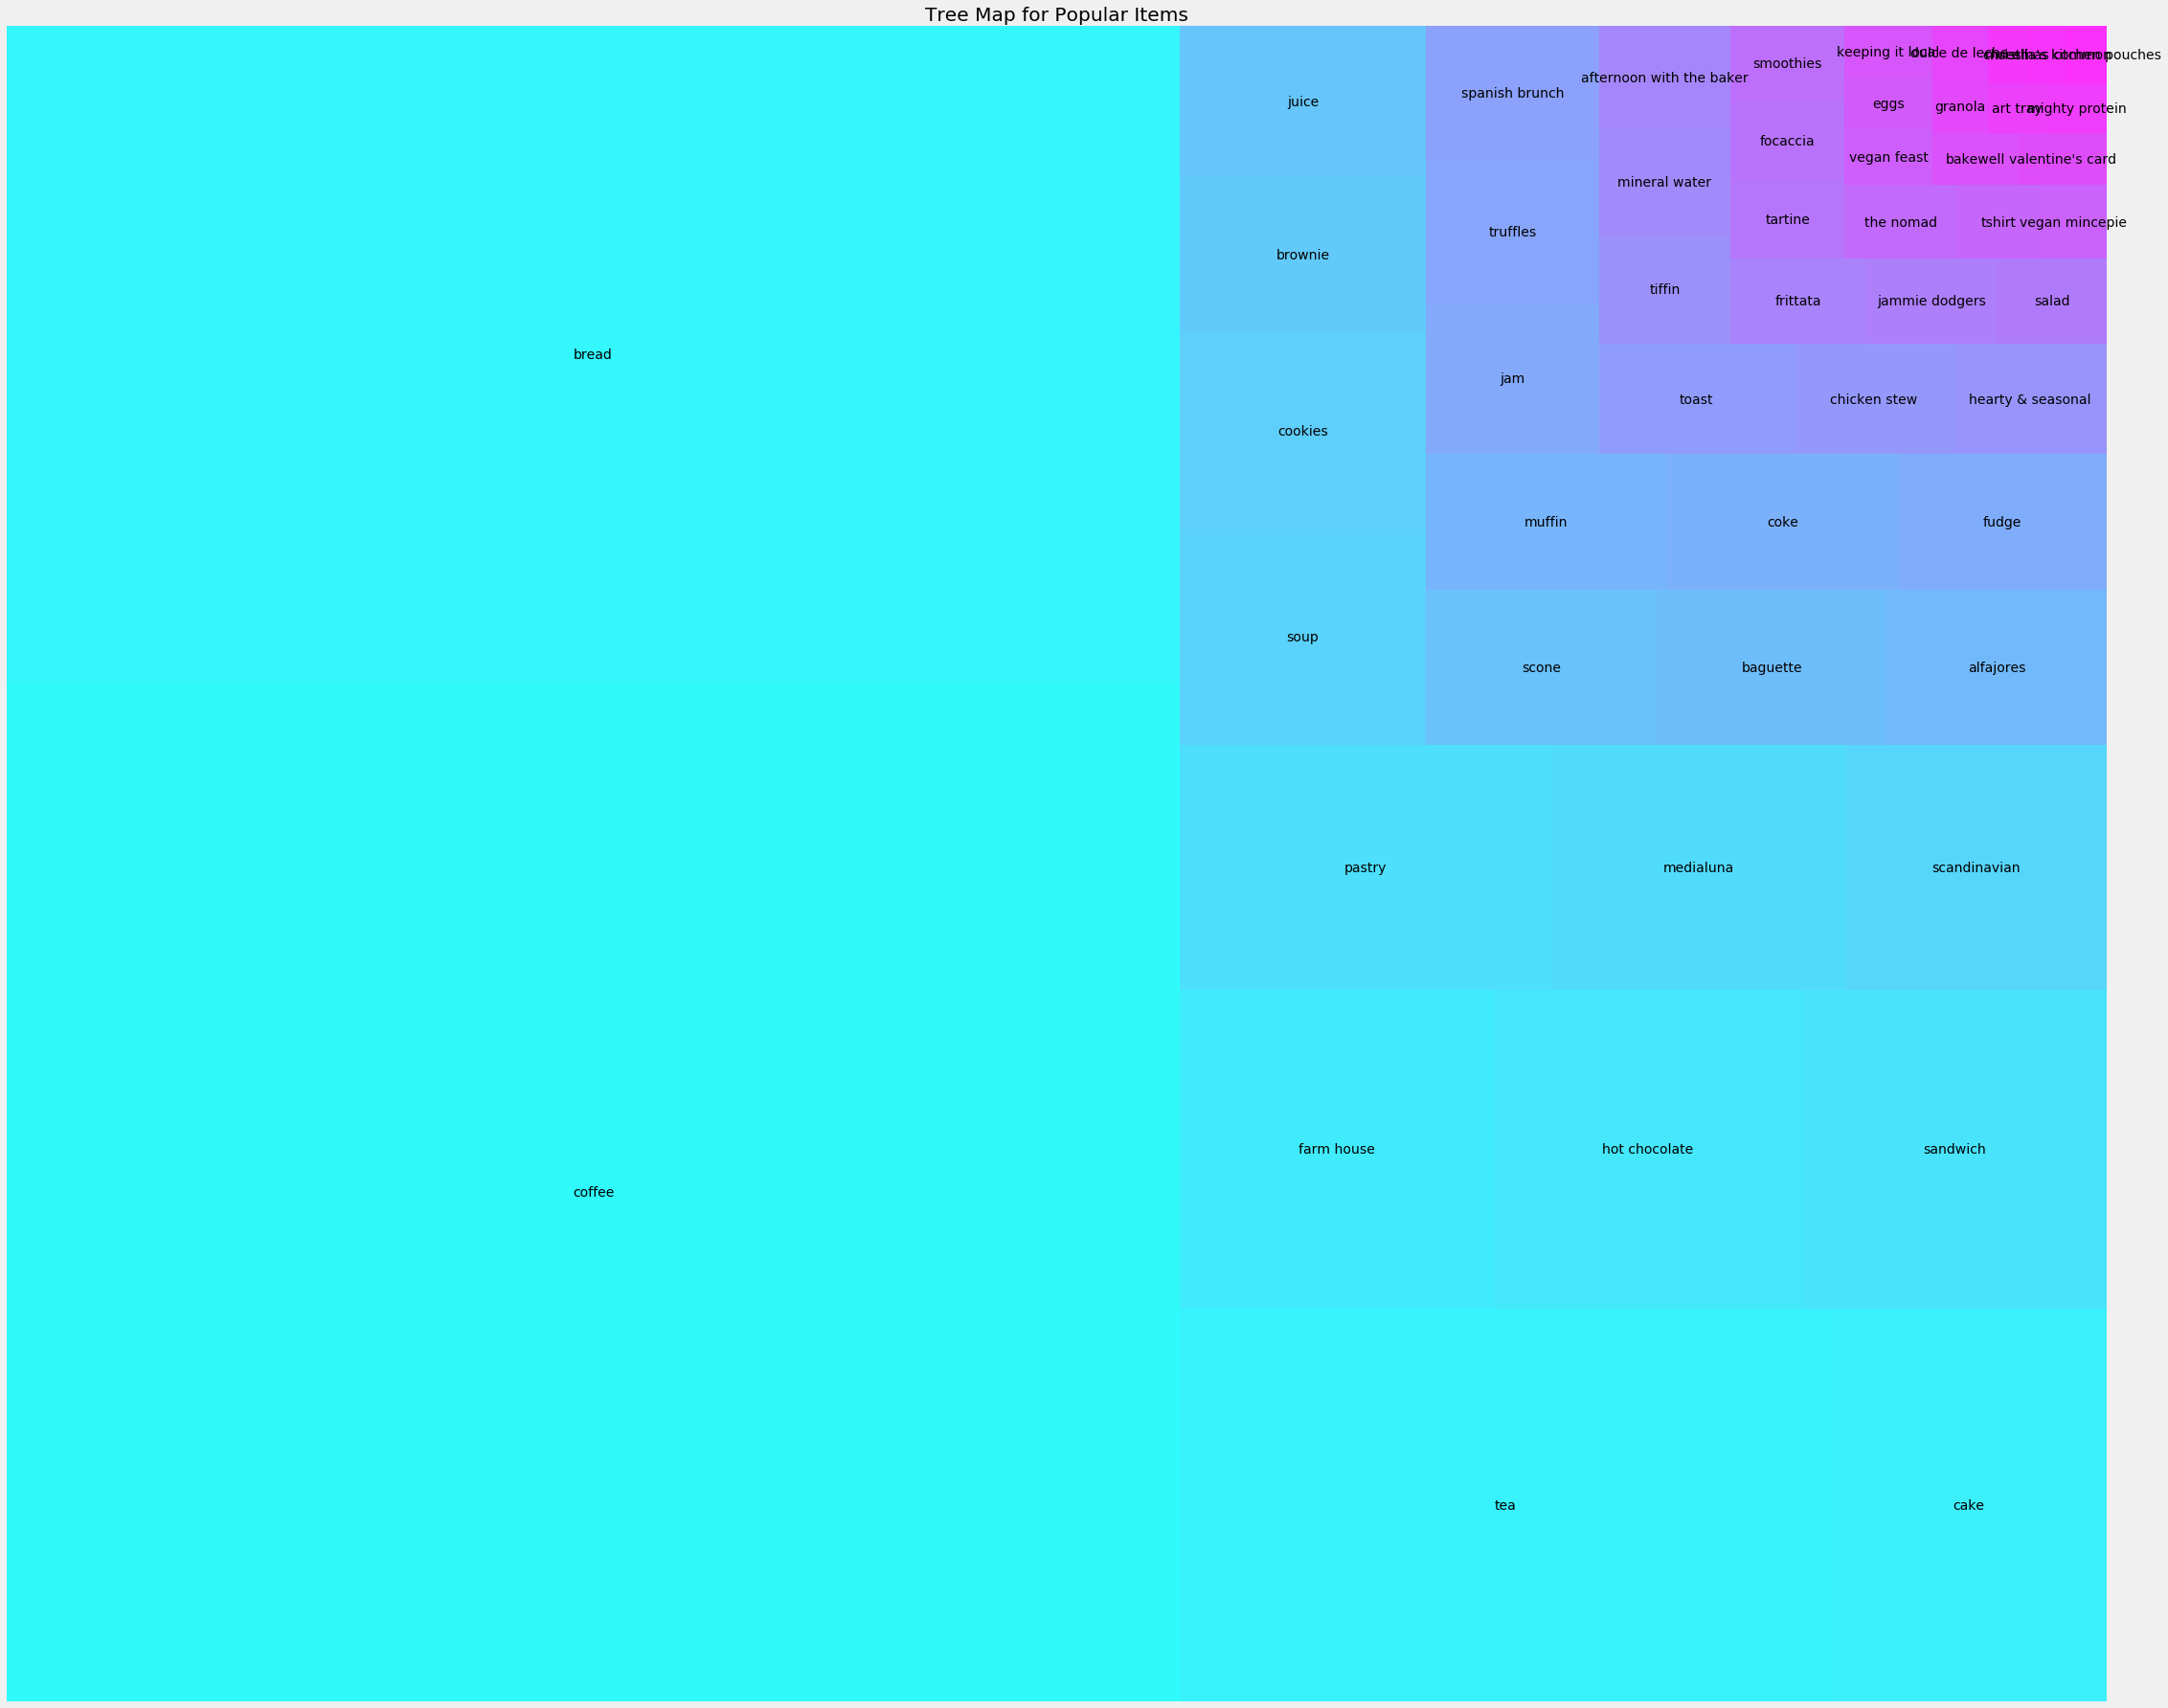

In [14]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (35, 30)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [15]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

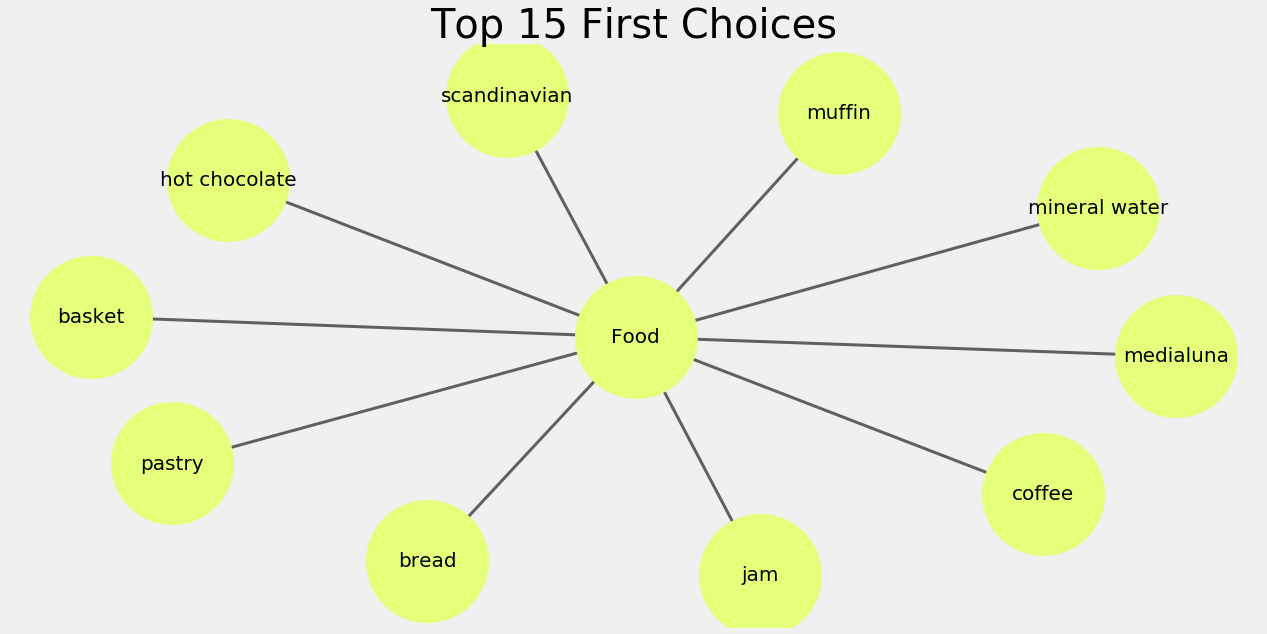

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 10)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [17]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 9465):
    trans.append([str(data.values[i,j]) for j in range(0, 11)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(9465, 11)


In [18]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(9465, 95)

In [19]:
import warnings
warnings.filterwarnings('ignore')
data = data.loc[:, ['coffee', 'bread', 'tea', 'cake', 'farm house', 'hot chocolate',
       'sandwich', 'pastry', 'medialuna', 'scandinavian', 'soup', 'cookies',
       'brownie', 'juice', 'scone', 'baguette', 'alfajores', 'muffin', 'coke',
       'fudge', 'jam', 'truffles', 'spanish brunch', 'toast', 'chicken stew',
       'hearty & seasonal', 'tiffin', 'mineral water',
       'afternoon with the baker', 'frittata', 'jammie dodgers', 'salad',
       'tartine', 'focaccia', 'smoothies', 'the nomad', 'tshirt',
       'vegan mincepie', 'vegan feast', 'keeping it local', 'bakewell', 'eggs',
       'valentine\'s card', 'dulce de leche', 'mighty protein', 'art tray',
       'granola', 'ella\'s kitchen pouches', 'muesli', 'christmas common']]

In [20]:
data.shape

(9465, 50)

In [21]:
data.columns

Index(['coffee', 'bread', 'tea', 'cake', 'farm house', 'hot chocolate',
       'sandwich', 'pastry', 'medialuna', 'scandinavian', 'soup', 'cookies',
       'brownie', 'juice', 'scone', 'baguette', 'alfajores', 'muffin', 'coke',
       'fudge', 'jam', 'truffles', 'spanish brunch', 'toast', 'chicken stew',
       'hearty & seasonal', 'tiffin', 'mineral water',
       'afternoon with the baker', 'frittata', 'jammie dodgers', 'salad',
       'tartine', 'focaccia', 'smoothies', 'the nomad', 'tshirt',
       'vegan mincepie', 'vegan feast', 'keeping it local', 'bakewell', 'eggs',
       'valentine's card', 'dulce de leche', 'mighty protein', 'art tray',
       'granola', 'ella's kitchen pouches', 'muesli', 'christmas common'],
      dtype='object')

In [22]:
data.head()

,coffee,bread,tea,cake,farm house,hot chocolate,sandwich,pastry,medialuna,scandinavian,...,bakewell,eggs,valentine's card,dulce de leche,mighty protein,art tray,granola,ella's kitchen pouches,muesli,christmas common
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.478394,(coffee)
1,0.327205,(bread)
2,0.142631,(tea)
3,0.103856,(cake)
4,0.039197,(farm house)
5,0.058320,(hot chocolate)
6,0.071844,(sandwich)
7,0.086107,(pastry)
8,0.061807,(medialuna)
9,0.029054,(scandinavian)


In [24]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.478394,(coffee),1
1,0.327205,(bread),1
2,0.142631,(tea),1
3,0.103856,(cake),1
4,0.039197,(farm house),1
5,0.058320,(hot chocolate),1
6,0.071844,(sandwich),1
7,0.086107,(pastry),1
8,0.061807,(medialuna),1
9,0.029054,(scandinavian),1


In [23]:
# getting th item sets with length = 3 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
58,0.010037,"(cake, coffee, bread)",3
59,0.011199,"(pastry, coffee, bread)",3
60,0.010037,"(cake, coffee, tea)",3


In [24]:
#Association Mining
frequent_itemsets[ frequent_itemsets['itemsets'] == {'tea', 'cake'} ]

,support,itemsets,length
55,0.023772,"(cake, tea)",2


In [25]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'toast'} ]


,support,itemsets,length
23,0.033597,(toast),1


In [26]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'coffee'} ]


,support,itemsets,length
0,0.478394,(coffee),1


In [27]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
0,0.478394,(coffee),1
1,0.327205,(bread),1
2,0.142631,(tea),1
3,0.103856,(cake),1
4,0.039197,(farm house),1
5,0.058320,(hot chocolate),1
6,0.071844,(sandwich),1
7,0.086107,(pastry),1
8,0.061807,(medialuna),1
9,0.029054,(scandinavian),1


In [29]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
30,0.090016,"(coffee, bread)",2
31,0.049868,"(coffee, tea)",2
32,0.054728,"(cake, coffee)",2
33,0.029583,"(hot chocolate, coffee)",2
34,0.038246,"(coffee, sandwich)",2
35,0.047544,"(pastry, coffee)",2
36,0.035182,"(medialuna, coffee)",2
37,0.015848,"(coffee, soup)",2
38,0.028209,"(coffee, cookies)",2
39,0.019651,"(brownie, coffee)",2


In [30]:
frequent_itemsets[ (frequent_itemsets['length'] == 4) &
                   (frequent_itemsets['support'] >= 0.01)]

,support,itemsets,length
